<a href="https://colab.research.google.com/github/sohanchatterjee/ISE-490/blob/main/Copy_of_EM490_HW6_Machine_Learning_Landscape_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Please enter your name and student ID here.**

Sohan Chatterjee

2006064


**Homework - Machine Learning Landscape**

Use the concepts you learned in *Machine Learning Landscape*, specifically the two regression methods (linear regression and k-nearest neighbors), to analyze the dataset provided in `population_vs_day.csv`.
In this file:

- **date** : Represents the specific date.

- **day** : The day index, where 20190101 is assumed to be Day 1, 20190102 is Day 2, and so forth.

- **population** : The population of a species, recorded in millions.

Utilize both linear regression and k-nearest neighbors to identify trends in the population data over time.

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change current directory
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
# Verify the current directory
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
# Verify the current directory
%ls

'Copy of Convert ipynb to HTML in Colab.ipynb'
'Copy of EM490- HW2_RegularExpression_Starter.ipynb'
'Copy of EM490- HW3_NumPy_Starter.ipynb'
'Copy of EM490-HW4_Pandas_Starter.ipynb'
'Copy of EM490 HW6_Machine_Learning_Landscape_Starter.ipynb'
'Copy of PythonBasics_Starter.ipynb'
 EmissionsData.csv
 ISE490-HW1_PythonBasics_Starter.ipynb
 lifesat.csv
 population_vs_day.csv


## Q1. (0.5 points)

Use pandas to load the dataset into a DataFrame.

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>date</th>
      <th>day</th>
      <th>population</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>20190101</td>
      <td>1</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>20190102</td>
      <td>2</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>20190103</td>
      <td>3</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>20190104</td>
      <td>4</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>20190105</td>
      <td>5</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>985</th>
      <td>20210912</td>
      <td>986</td>
      <td>721.081622</td>
    </tr>
    <tr>
      <th>986</th>
      <td>20210913</td>
      <td>987</td>
      <td>721.081622</td>
    </tr>
    <tr>
      <th>987</th>
      <td>20210914</td>
      <td>988</td>
      <td>881.321983</td>
    </tr>
    <tr>
      <th>988</th>
      <td>20210915</td>
      <td>989</td>
      <td>640.961442</td>
    </tr>
    <tr>
      <th>989</th>
      <td>20210916</td>
      <td>990</td>
      <td>560.841262</td>
    </tr>
  </tbody>
</table>
<p>990 rows × 3 columns</p>
</div>

In [ ]:
import pandas as pd

df = pd.read_csv('population_vs_day.csv')

## Q2. (1 point)

Use `matplotlib`'s `scatter()` function to visualize the dataset.

You should get a figure similar to this one.

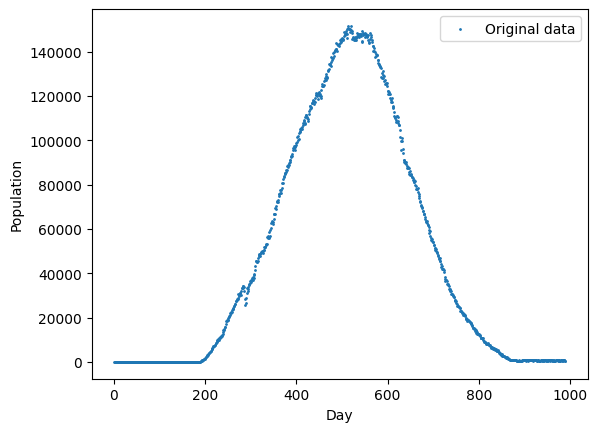

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['day'], df['population'], s=1, label="Original data")
plt.xlabel('Day')
plt.ylabel('Population')
plt.legend()
plt.show()

## Q3. (0.5 points)

Use Python code to find the minimum and maximum population values.

```text
Minimum population: 0.0
Maximum population: 151667.5013
```

In [ ]:
min = df['population'].min()
max = df['population'].max()
print('Minimum population:', min)
print('Maximum population:', max)

Minimum population: 0.0
Maximum population: 151667.5013


## Q4. (0.5 points)

Write a few sentences describing your findings from the dataset, including details like the maximum, minimum, and population trends. Try to craft a narrative around the data.

Provide your answer here.

The minimum population over the course is 0 while the maximum is 151667.5013 however, this must be rounded down to 151667 to account for a whole person. When capturing values that large, math and statistics are involved and this may be a calculated value rather than recorded. The population follows a bell curve, rising for the first half of the timeline and hitting its peak just after halfway, then gradually decreasing mirrored to how it rose. Population increases gradually, then rapidly, peaks, then decreases rapidly before tapering off back down to 0.

## Q5. (0.5 points)

Write Python code to get the training features `X` (the 'day' column from the dataset).

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>day</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>985</th>
      <td>986</td>
    </tr>
    <tr>
      <th>986</th>
      <td>987</td>
    </tr>
    <tr>
      <th>987</th>
      <td>988</td>
    </tr>
    <tr>
      <th>988</th>
      <td>989</td>
    </tr>
    <tr>
      <th>989</th>
      <td>990</td>
    </tr>
  </tbody>
</table>
<p>990 rows × 1 columns</p>
</div>

In [ ]:
X = df[['day']]
print(X.head())

   day
0    1
1    2
2    3
3    4
4    5


## Q6. (0.5 points)

Write Python code to get the training target `y` (the 'population' column from the dataset).

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>population</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>985</th>
      <td>721.081622</td>
    </tr>
    <tr>
      <th>986</th>
      <td>721.081622</td>
    </tr>
    <tr>
      <th>987</th>
      <td>881.321983</td>
    </tr>
    <tr>
      <th>988</th>
      <td>640.961442</td>
    </tr>
    <tr>
      <th>989</th>
      <td>560.841262</td>
    </tr>
  </tbody>
</table>
<p>990 rows × 1 columns</p>
</div>

In [ ]:
y = df['population'].values
print(y[:5])

[0. 0. 0. 0. 0.]


## Q7. (1 point)

Use `sklearn.linear_model.LinearRegression` to train a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Q8. (1 point)

Use `sklearn.neighbors.KNeighborsRegressor` to train a k-NN model.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn_model = KNeighborsRegressor(n_neighbors=5)
kn_model.fit(x.values.reshape(-1, 1), y)

KNeighborsRegressor()

## Q9. (0.5 points)

Use `numpy.arange()` to generate 11 numbers: [0, 100, 200, ..., 1000]. Reshape it to (11, 1) and name it `X_test`.

```text
array([[   0],
       [ 100],
       [ 200],
       [ 300],
       [ 400],
       [ 500],
       [ 600],
       [ 700],
       [ 800],
       [ 900],
       [1000]])
```

In [ ]:
import numpy as np
X_test = np.arange(0, 1100, 100).reshape(11, 1)
print(X_test)

[[   0]
 [ 100]
 [ 200]
 [ 300]
 [ 400]
 [ 500]
 [ 600]
 [ 700]
 [ 800]
 [ 900]
 [1000]]


## Q10. (0.5 points)

Use the linear model to predict the population for the days in `X_test` using the `predict()` function.

You should get a result similar to this.

```text
array([41276.58174422, 42585.14843232, 43893.71512041, 45202.2818085,
       46510.84849659, 47819.41518468, 49127.98187277, 50436.54856086,
       51745.11524895, 53053.68193704, 54362.24862513])
```

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[41276.58174422 42585.14843232 43893.71512041 45202.2818085
 46510.84849659 47819.41518468 49127.98187277 50436.54856086
 51745.11524895 53053.68193704 54362.24862513]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Q11. (0.5 points)

Use the k-NN model to predict the population for the days in `X_test` using the `predict()` function.

You should get a result similar to this.

```text
array([     0.        ,      0.        ,   1794.692038  ,  36518.778166  ,
        98595.893836  , 145257.88682   , 123224.83724   ,  53728.592888  ,
        12418.62794   ,    833.2498748 ,    705.05758638])
```

In [ ]:
y_pred_knn = kn_model.predict(X_test)
print(y_pred_knn)

[     0.              0.           1794.692038    36518.778166
  98595.893836   145257.88682    123224.83724     53728.592888
  12418.62794       833.2498748     705.05758638]


## Q12. (2 points)

Visualize the results on the figure using `scatter()`.

You should get a result similar to this.

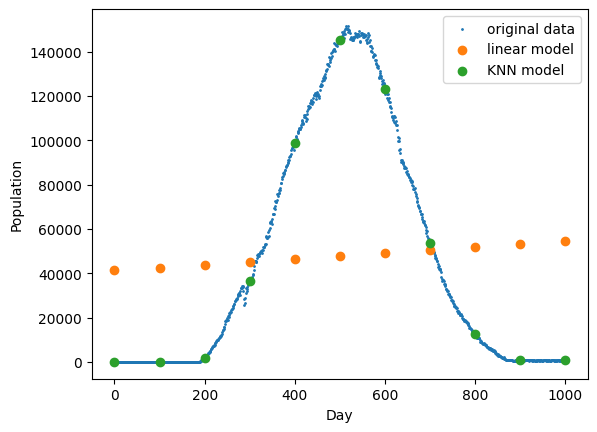

In [ ]:
plt.scatter(X, y, s=1, label="original data")
plt.scatter(X_test, y_pred, label="linear model")
plt.scatter(X_test, y_pred_knn, label="KNN model")
plt.xlabel("Day")
plt.ylabel("Population")
plt.legend()
plt.show()

## Q13. (0.5 points)

Write a few sentences to comment on the results.

In the plot, the actual training data can be compared to the linear regression model and KNN model to draw conclusions about population growth. The linear model indicates a positively trending growth, which implies a steady rate of increase. The KNN model captures non-linear patterns and more accurately describes the changes in population as it adapts to variation, showing both increase and decrease.

## Q14. (0.5 points)

Can you think of ways to improve the linear model? Write a few sentences to explain your answer.

Checking for outliers may provide a more accurate set. Linear regression specifically can be sensitive to outliers as they may cause the model to incorrectly determine rates and trends. Another improvement could be to use polynomial features rather than a straight line. In a set like this, using a curve may better fit the data and draw more accurate conclusions.